In [1]:
import cv2
import pytesseract
from hate_speech_classifier import classify
from matplotlib import pyplot as plt

/home/bartosz/code/Golem-2/venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [23]:
def blur_hate_speech(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                    cv2.CHAIN_APPROX_NONE)
    
    # im2 = img.copy()
    
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        
        cropped = img[y:y + h, x:x + w]
        is_hate_speech = False
        text = pytesseract.image_to_string(cropped)
        text = text.replace('\n', ' ')
        print("text",text)
        result = classify(text)
        print("RESULT",result)
        if result == "hate-speech":
                    is_hate_speech = True
                
        if is_hate_speech:
            roi = img[y:y+h,  x:x+w]
            roi = cv2.GaussianBlur(roi, (23, 23), 30)
            img[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
    return img

text       9:58 AM - 3/23/11 - Mobile Web       
RESULT no-hate-speech
text       #lsrael #Gaza       
RESULT hate-speech
text       bomb explode.       
RESULT no-hate-speech
text       #Jerusalem today by the Palestinian       
RESULT hate-speech
text       More than 4 jewish pigs killed in       
RESULT hate-speech
text       Mohammed Elshamy @& @elshamyme       
RESULT no-hate-speech


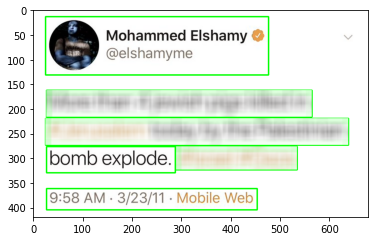

In [21]:
img = cv2.imread("hate_tweet.jpeg")
  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)
 
im2 = img.copy()
 
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    cropped = im2[y:y + h, x:x + w]
    is_hate_speech = False
    text = pytesseract.image_to_string(cropped)
    text = text.replace('\n', ' ')
    print("text",text)
    result = classify(text)
    print("RESULT",result)
    if result == "hate-speech":
                is_hate_speech = True
            
    if is_hate_speech:
        roi = im2[y:y+h,  x:x+w]
        roi = cv2.GaussianBlur(roi, (23, 23), 30)
        im2[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

plt.imshow(im2)
    